In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # for seaborn themes with matplotlib functions

# Data Preprocessing

## Raw data

In [2]:
df = pd.read_csv("109~102JuneTraffic.csv")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 860: invalid start byte

In [29]:
df.head()

Unnamed: 0     年  月  日  時   分   縣市    區    死   受傷  ...      GPS經度  事故類別  \
0           0  2020  6  1  1  17  臺中市  西屯區  0.0  2.0  ...  24.170420     2   
1           1  2020  6  1  1  58  臺中市  潭子區  0.0  0.0  ...  24.200326     3   
2           2  2020  6  1  2  20  臺中市   西區  0.0  0.0  ...  24.154103     3   
3           3  2020  6  1  5  48  臺中市  龍井區  0.0  3.0  ...  24.186988     2   
4           4  2020  6  1  5  54  臺中市  神岡區  0.0  2.0  ...  24.273396     2   

   序號  縣市別代碼 機關代碼   市話   傳真  GPS座標X  GPS座標Y              time  
0 NaN    NaN  NaN  NaN  NaN     NaN     NaN  2020-6-1T1:17:00  
1 NaN    NaN  NaN  NaN  NaN     NaN     NaN  2020-6-1T1:58:00  
2 NaN    NaN  NaN  NaN  NaN     NaN     NaN  2020-6-1T2:20:00  
3 NaN    NaN  NaN  NaN  NaN     NaN     NaN  2020-6-1T5:48:00  
4 NaN    NaN  NaN  NaN  NaN     NaN     NaN  2020-6-1T5:54:00  

[5 rows x 59 columns]

In [30]:
df.tail()

Unnamed: 0     年  月   日   時   分   縣市    區    死   受傷  ...  GPS經度  事故類別  \
30437       12077  2023  6  30  22  51  臺中市  西屯區  0.0  1.0  ...    NaN     2   
30438       12078  2023  6  30  22  57  臺中市  大安區  1.0  6.0  ...    NaN     1   
30439       12079  2023  6  30  23   7  臺中市  大安區  0.0  2.0  ...    NaN     2   
30440       12080  2023  6  30  23   8  臺中市  西屯區  0.0  0.0  ...    NaN     3   
30441       12081  2023  6  30  23  15  臺中市   北區  0.0  1.0  ...    NaN     2   

            序號    縣市別代碼        機關代碼            市話            傳真      GPS座標X  \
30437  12078.0  66000.0  387130000C  (04)23274275  (04)23288582  120.637060   
30438  12079.0  66000.0  387130000C  (04)23274275  (04)23288582  120.585762   
30439  12080.0  66000.0  387130000C  (04)23274275  (04)23288582  120.601313   
30440  12081.0  66000.0  387130000C  (04)23274275  (04)23288582  120.637938   
30441  12082.0  66000.0  387130000C  (04)23274275  (04)23288582  120.676846   

          GPS座標Y                time  
30437  24.173363  2023-6-30T22:51:00  
30438  24.364999  2023-6-30T22:57:00  
30439  24.371181   2023-6-30T23:7:00  
30440  24.166799   2023-6-30T23:8:00  
30441  24.162634  2023-6-30T23:15:00  

[5 rows x 59 columns]

## Variable Type

In [33]:
# drop unneeded varaibles
df.drop(['市話','傳真', '機關代碼', '縣市別代碼', '縣市', '序號', 'Unnamed: 0', 'time'], axis=1, inplace=True) 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30056 entries, 0 to 30441
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   年          30056 non-null  category
 1   月          30056 non-null  int64   
 2   日          30056 non-null  int64   
 3   時          30056 non-null  int64   
 4   分          30056 non-null  int64   
 5   區          30056 non-null  category
 6   死          30030 non-null  float64 
 7   受傷         30030 non-null  float64 
 8   2-30       30030 non-null  float64 
 9   天候         29169 non-null  category
 10  光線         16760 non-null  category
 11  道路類別       16758 non-null  category
 12  速限         30056 non-null  category
 13  道路型態       16700 non-null  category
 14  事故位置       16702 non-null  category
 15  路面鋪裝       16703 non-null  category
 16  路面狀態       16702 non-null  category
 17  路面缺陷       16701 non-null  category
 18  障礙物        16703 non-null  category
 19  視距         16699 non-null

In [62]:
df.columns

Index(['年', '月', '日', '時', '分', '區', '死', '受傷', '2-30', '天候', '光線', '道路類別',
       '速限', '道路型態', '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距', '號誌種類',
       '號誌動作', '分向設施', '快車道或一般車道間', '快慢車道間', '路面邊線', '事故類型及型態', '主要肇因', '受傷程度',
       '主要傷處', '保護裝備', '行動電話', '當事者區分', '車輛用途', '當事者行動狀態', '駕駛資格情形', '駕駛執照種類',
       '飲酒情形', '車輛撞擊部位最初', '車輛撞擊部位其他', '肇事因素個別', '肇事因素主要', '肇事逃逸', '職業',
       '旅次目的', '車種', 'GPS緯度', 'GPS經度', '事故類別', 'GPS座標X', 'GPS座標Y'],
      dtype='object')

In [70]:
ordinals = ['年', '區', '天候', '光線', '道路類別',
       '速限', '道路型態', '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距', '號誌種類',
       '號誌動作', '分向設施', '快車道或一般車道間', '快慢車道間', '路面邊線', '事故類型及型態', '主要肇因', '受傷程度',
       '主要傷處', '保護裝備', '行動電話', '車輛用途', '當事者行動狀態', '駕駛資格情形', '駕駛執照種類',
       '飲酒情形', '車輛撞擊部位最初', '車輛撞擊部位其他', '肇事因素個別', '肇事因素主要', '肇事逃逸', '職業',
       '旅次目的', '事故類別']
undefined = ['當事者區分',  '車種', '月', '日', '時', '分', '2-30']
numerics = ["死", '受傷', 'GPS緯度', 'GPS經度', 'GPS座標X', 'GPS座標Y']

In [71]:
df['速限'] = pd.to_numeric(df['速限'], errors='coerce')
df = df.dropna(subset=['速限'])
df[numerics] = df[numerics].astype(float)

In [73]:
df[ordinals] = df[ordinals].astype('category')

In [75]:
df.nunique() # number of uniques elements in each column

年                4
月                1
日               30
時               24
分               60
區               29
死                2
受傷               9
2-30             3
天候               6
光線               4
道路類別             7
速限              17
道路型態            15
事故位置            19
路面鋪裝             5
路面狀態             5
路面缺陷             4
障礙物              5
視距               7
號誌種類             4
號誌動作             4
分向設施            10
快車道或一般車道間        5
快慢車道間            5
路面邊線             2
事故類型及型態         28
主要肇因            58
受傷程度             5
主要傷處            11
保護裝備             4
行動電話             5
當事者區分           39
車輛用途             7
當事者行動狀態         21
駕駛資格情形           8
駕駛執照種類          19
飲酒情形            11
車輛撞擊部位最初        16
車輛撞擊部位其他        14
肇事因素個別          57
肇事因素主要          57
肇事逃逸             2
職業              23
旅次目的             9
車種              39
GPS緯度        16513
GPS經度        16550
事故類別             4
GPS座標X       10276
GPS座標Y       10332
dtype: int64

In [76]:
# tabularize ordinal variables

[df[col].value_counts() for col in ordinals]


[2023    12061
 2020     6369
 2022     6071
 2021     5555
 Name: 年, dtype: int64,
 西屯區    3584
 北屯區    3023
 南屯區    2456
 北區     2059
 大里區    1740
 西區     1661
 太平區    1557
 豐原區    1364
 南區     1291
 東區     1243
 大雅區    1223
 潭子區    1077
 沙鹿區    1012
 烏日區     816
 霧峰區     773
 清水區     726
 梧棲區     723
 大甲區     701
 龍井區     683
 神岡區     547
 后里區     392
 中區      337
 大肚區     315
 東勢區     234
 外埔區     133
 石岡區     118
 新社區     118
 大安區     110
 和平區      40
 Name: 區, dtype: int64,
 8.0    24681
 6.0     3263
 7.0     1210
 1.0       12
 2.0        2
 5.0        1
 Name: 天候, dtype: int64,
 1.0    13070
 3.0     3016
 2.0      573
 4.0      101
 Name: 光線, dtype: int64,
 5.0    16617
 8.0       60
 7.0       25
 2.0       18
 6.0       15
 4.0       13
 3.0       10
 Name: 道路類別, dtype: int64,
 50.0    20874
 30.0     3778
 40.0     3215
 60.0     1214
 70.0      454
 80.0      297
 1.0       104
 25.0       34
 90.0       25
 0.0        17
 10.0       14
 5.0        12
 20.0        7
 35.0

In [80]:
df[numerics].describe().T

count        mean       std         min         25%         50%  \
死       30030.0    0.001532  0.039109    0.000000    0.000000    0.000000   
受傷      30030.0    0.679520  0.774130    0.000000    0.000000    1.000000   
GPS緯度   17971.0  120.662944  0.055381  120.489569  120.637700  120.669068   
GPS經度   17971.0   24.179883  0.062578   24.007333   24.140138   24.166947   
GPS座標X  11701.0  120.663038  0.053440  120.490669  120.637465  120.667573   
GPS座標Y  11701.0   24.174698  0.058840   24.012041   24.139459   24.164901   

               75%         max  
死         0.000000    1.000000  
受傷        1.000000    8.000000  
GPS緯度   120.697393  121.322103  
GPS經度    24.218369   24.430956  
GPS座標X  120.695867  121.317820  
GPS座標Y   24.201521   24.428241

In [81]:
df.describe(include = 'all').T

count unique     top     freq        mean       std         min  \
年          30056.0    4.0  2023.0  12061.0         NaN       NaN         NaN   
月          30056.0    NaN     NaN      NaN         6.0       0.0         6.0   
日          30056.0    NaN     NaN      NaN   15.782173  8.634474         1.0   
時          30056.0    NaN     NaN      NaN   13.467927  4.776791         0.0   
分          30056.0    NaN     NaN      NaN   28.925739  17.23053         0.0   
區            30056     29     西屯區     3584         NaN       NaN         NaN   
死          30030.0    NaN     NaN      NaN    0.001532  0.039109         0.0   
受傷         30030.0    NaN     NaN      NaN     0.67952   0.77413         0.0   
2-30       30030.0    NaN     NaN      NaN    0.000599    0.0258         0.0   
天候         29169.0    6.0     8.0  24681.0         NaN       NaN         NaN   
光線         16760.0    4.0     1.0  13070.0         NaN       NaN         NaN   
道路類別       16758.0    7.0     5.0  16617.0         NaN       NaN         NaN   
速限         30056.0   17.0    50.0  20874.0         NaN       NaN         NaN   
道路型態       16700.0   15.0     4.0   6480.0         NaN       NaN         NaN   
事故位置       16702.0   19.0     1.0   8266.0         NaN       NaN         NaN   
路面鋪裝       16703.0    5.0     1.0  16621.0         NaN       NaN         NaN   
路面狀態       16702.0    5.0     5.0  14258.0         NaN       NaN         NaN   
路面缺陷       16701.0    4.0     4.0  16647.0         NaN       NaN         NaN   
障礙物        16703.0    5.0     5.0  16496.0         NaN       NaN         NaN   
視距         16699.0    7.0     7.0  16510.0         NaN       NaN         NaN   
號誌種類       16714.0    4.0     4.0   9718.0         NaN       NaN         NaN   
號誌動作       16700.0    4.0     4.0   9703.0         NaN       NaN         NaN   
分向設施       16702.0   10.0    10.0   7747.0         NaN       NaN         NaN   
快車道或一般車道間  16701.0    5.0     5.0  10859.0         NaN       NaN         NaN   
快慢車道間      16700.0    5.0     5.0  12687.0         NaN       NaN         NaN   
路面邊線       16703.0    2.0     2.0  12767.0         NaN       NaN         NaN   
事故類型及型態    16735.0   28.0    16.0   5447.0         NaN       NaN         NaN   
主要肇因       26428.0   58.0    23.0   6866.0         NaN       NaN         NaN   
受傷程度       16278.0    5.0     2.0   8571.0         NaN       NaN         NaN   
主要傷處       16118.0   11.0    10.0   7490.0         NaN       NaN         NaN   
保護裝備       16117.0    4.0     1.0  13809.0         NaN       NaN         NaN   
行動電話       16117.0    5.0     1.0  13623.0         NaN       NaN         NaN   
當事者區分        29715     39     B03    13370         NaN       NaN         NaN   
車輛用途       16116.0    7.0     7.0  15975.0         NaN       NaN         NaN   
當事者行動狀態    16144.0   21.0     9.0   7714.0         NaN       NaN         NaN   
駕駛資格情形     29792.0    8.0     1.0  27467.0         NaN       NaN         NaN   
駕駛執照種類     16435.0   19.0    10.0   7865.0         NaN       NaN         NaN   
飲酒情形       29802.0   11.0     2.0  23068.0         NaN       NaN         NaN   
車輛撞擊部位最初   16244.0   16.0    11.0   3986.0         NaN       NaN         NaN   
車輛撞擊部位其他     392.0   14.0    12.0    122.0         NaN       NaN         NaN   
肇事因素個別     30047.0   57.0    23.0   8117.0         NaN       NaN         NaN   
肇事因素主要     21315.0   57.0    23.0   5144.0         NaN       NaN         NaN   
肇事逃逸       29841.0    2.0     1.0  29476.0         NaN       NaN         NaN   
職業         28611.0   23.0    22.0  13234.0         NaN       NaN         NaN   
旅次目的       16121.0    9.0     8.0  11828.0         NaN       NaN         NaN   
車種           29715     39     B03    13370         NaN       NaN         NaN   
GPS緯度      17971.0    NaN     NaN      NaN  120.662944  0.055381  120.489569   
GPS經度      17971.0    NaN     NaN      NaN   24.179883  0.062578   24.007333   
事故類別       30056.0    4.0     2.0  15467.0         NaN       NaN         NaN   
GPS座標X     11

In [85]:
# percentage of missing values in each variable
df.isnull().sum() / len(df) 

年            0.000000
月            0.000000
日            0.000000
時            0.000000
分            0.000000
區            0.000000
死            0.000865
受傷           0.000865
2-30         0.000865
天候           0.029512
光線           0.442374
道路類別         0.442441
速限           0.000000
道路型態         0.444371
事故位置         0.444304
路面鋪裝         0.444271
路面狀態         0.444304
路面缺陷         0.444337
障礙物          0.444271
視距           0.444404
號誌種類         0.443905
號誌動作         0.444371
分向設施         0.444304
快車道或一般車道間    0.444337
快慢車道間        0.444371
路面邊線         0.444271
事故類型及型態      0.443206
主要肇因         0.120708
受傷程度         0.458411
主要傷處         0.463734
保護裝備         0.463768
行動電話         0.463768
當事者區分        0.011345
車輛用途         0.463801
當事者行動狀態      0.462869
駕駛資格情形       0.008784
駕駛執照種類       0.453187
飲酒情形         0.008451
車輛撞擊部位最初     0.459542
車輛撞擊部位其他     0.986958
肇事因素個別       0.000299
肇事因素主要       0.290824
肇事逃逸         0.007153
職業           0.048077
旅次目的         0.463635
車種        

/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.draw()
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.draw()
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.draw()
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from current font.
  fig.canvas.draw()
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.canvas.draw()
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: U

/Users/weishangjie/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20809 (\N{CJK UNIFIED I

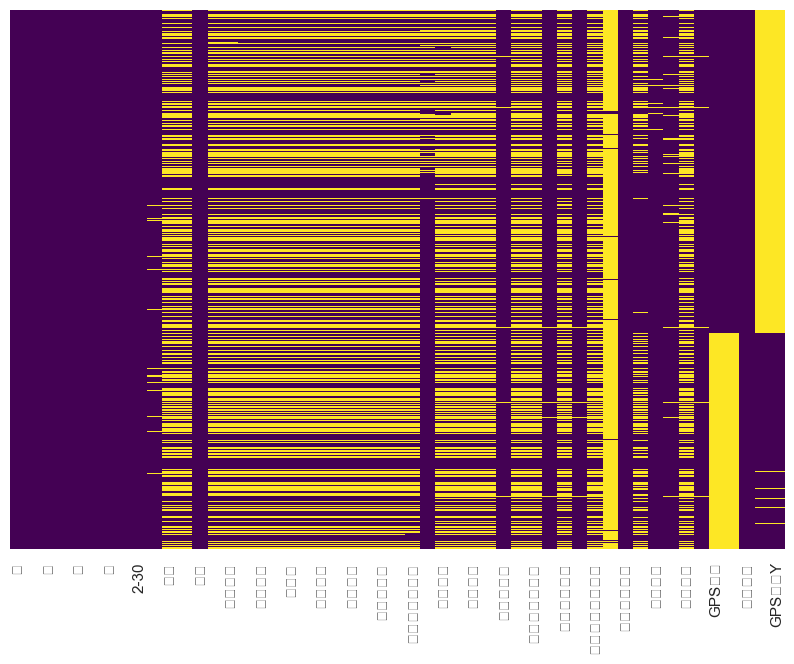

In [86]:
# plotting NA values
plt.figure(figsize=(10, 7))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap='viridis')
plt.show()

/var/folders/kh/sr_tcftj2751w5r2mn48gm1w0000gn/T/ipykernel_1764/2851701828.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['死'], bins=30, rug = True)
/Users/weishangjie/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


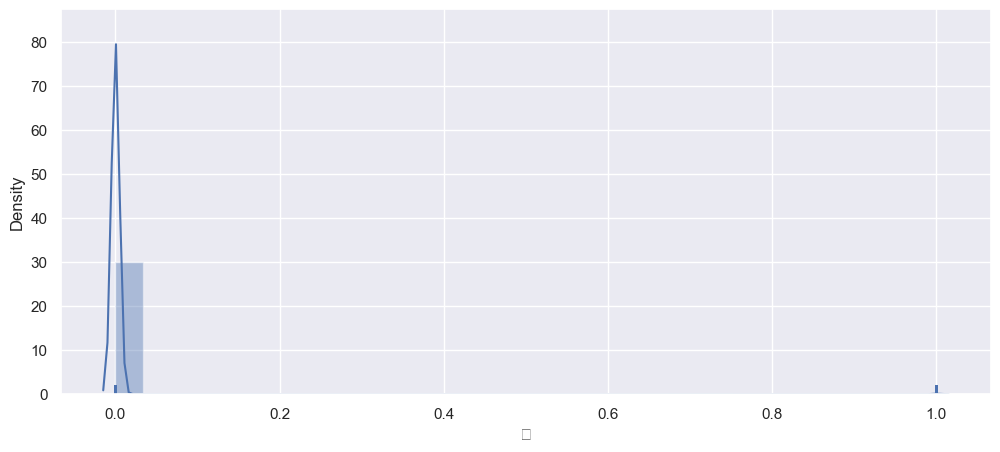

In [87]:
# data visualization

plt.figure(figsize=(12, 5))
sns.distplot(df['死'], bins=30, rug = True)
plt.show()

/var/folders/kh/sr_tcftj2751w5r2mn48gm1w0000gn/T/ipykernel_1764/266683598.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['年']==2023]['死'], label = "Death in 2023", bins = 30, rug = True)
/var/folders/kh/sr_tcftj2751w5r2mn48gm1w0000gn/T/ipykernel_1764/266683598.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

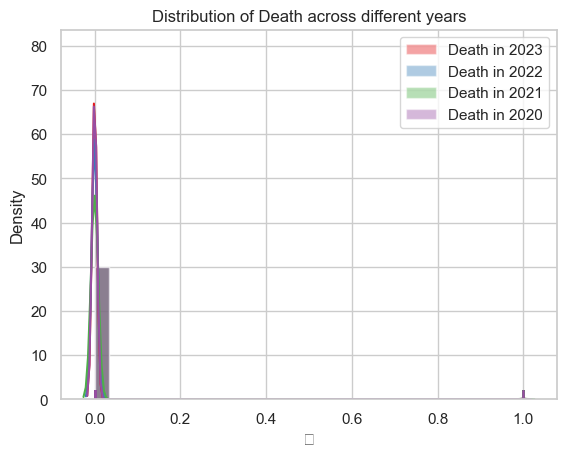

In [93]:
sns.set(style = "whitegrid")
sns.set_palette("Set1")

sns.distplot(df[df['年']==2023]['死'], label = "Death in 2023", bins = 30, rug = True)
sns.distplot(df[df['年']==2022]['死'], label = "Death in 2022", bins = 30, rug = True)
sns.distplot(df[df['年']==2021]['死'], label = "Death in 2021", bins = 30, rug = True)
sns.distplot(df[df['年']==2020]['死'], label = "Death in 2020", bins = 30, rug = True)


plt.xlabel('死')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Death across different years')
plt.show()


In [99]:
df.groupby(by = '年').agg({'死':['count', 'mean', 'median', 'min', 'max']})

死                           
      count      mean median  min  max
年                                     
2020   6346  0.001103    0.0  0.0  1.0
2021   5552  0.002341    0.0  0.0  1.0
2022   6071  0.001482    0.0  0.0  1.0
2023  12061  0.001410    0.0  0.0  1.0

In [ ]:
count_deaths = df.groupby('年')['死'].count()
sns.barplot(x=count_deaths.index, y=count_deaths.values)

plt.xlabel('Year')
plt.ylabel('Count Deaths')
plt.title('Count Deaths by Year')

plt.show()

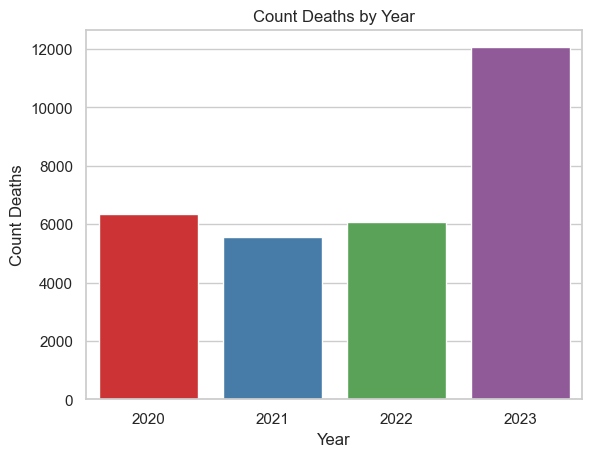

In [108]:
count_deaths = df.groupby('年')['死'].count()
sns.barplot(x=count_deaths.index, y=count_deaths.values)

plt.xlabel('Year')
plt.ylabel('Count Deaths')
plt.title('Count Deaths by Year')

plt.show()

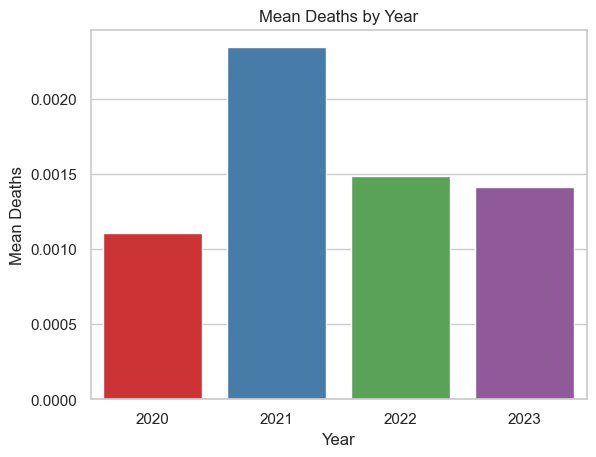

In [107]:
mean_deaths = df.groupby('年')['死'].mean()
sns.barplot(x=mean_deaths.index, y=mean_deaths.values)

plt.xlabel('Year')
plt.ylabel('Mean Deaths')
plt.title('Mean Deaths by Year')

plt.show()